<center>
<img src="../../img/beeline_data_school_logo.png">
# Школа данных "Билайн"
#### Интенсивный курс по изучению машинного обучения и анализа данных
<img src="../../img/beeline_logo.jpg" height="240" width="240">
### Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## <center>Домашнее задание 5. Сравнение случайного леса и Xgboost на данных по кредитному скорингу</center>

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import xgboost as xgb
import sys
sys.path.append('C:/Users/MsSurgeon/Documents/BeelineGit/scripts')
from log_progress import log_progress
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Считываем данные и заполняем пропуски медианными значениями.**

In [2]:
data = pd.read_csv('C:/Users/MsSurgeon/Documents/BeelineGit/data/credit_scoring_train.csv', index_col='client_id')

In [3]:
for col in data.columns:
    if pd.isnull(data[col]).sum():
        data[col].fillna(data[col].median(), inplace=True)

In [4]:
data.head()

,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
client_id,,,,,,,,,,
0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2206.731199,55.5,21,1,0.0,1,0,5424.552473,0.348227,0
3,886.132793,55.3,3,0,0.0,0,0,5424.552473,0.971930,0
4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0


In [5]:
target = data['Delinquent90'].values

In [6]:
train_df = data.drop('Delinquent90', axis=1)

**Постройте зависимость AUC на кросс-валидации от количества деревьев в лесу. Задайте максимальную глубину деревьев 8 и random_state=42.**

In [7]:
n_trees = [1] + range(10, 100, 10) 
folds = StratifiedKFold(target, n_folds=3, random_state=42)

In [8]:
%%time
forest_scores = []
for n_tree in log_progress(n_trees):
    forest = RandomForestClassifier(max_depth=8,n_estimators=n_tree, random_state=42)
    scores = cross_val_score(forest, train_df, target, scoring='roc_auc', cv=5)
    forest_scores.append(np.mean(scores))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Wall time: 2min 45s


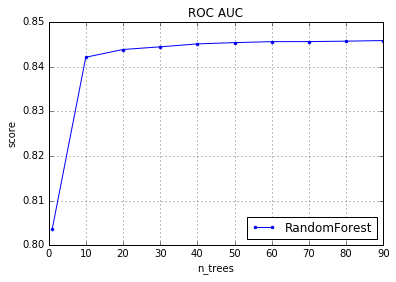

In [9]:
plot(n_trees, forest_scores, marker='.', label='RandomForest')
grid(True)
xlabel('n_trees')
ylabel('score')
title('ROC AUC')
legend(loc='lower right')

**Постройте зависимость средней AUC на кросс-валидации от количества итераций градиентного бустинга. Задайте темп обучения 0.3 и максимальную глубину деревьев 4.**

In [10]:
%%time
xgb_scores = []
for n_tree in log_progress(n_trees):
    gbdt = xgb.XGBClassifier (max_depth=4, n_estimators=n_tree, learning_rate=0.03)
    scores = cross_val_score(gbdt, train_df, target, scoring='roc_auc', cv=5)
    xgb_scores.append(np.mean(scores))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Wall time: 57.9 s


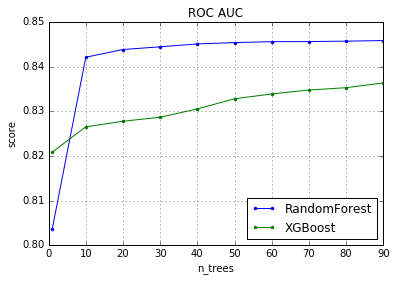

In [11]:
plot(n_trees, forest_scores, marker='.', label='RandomForest')
plot(n_trees, xgb_scores, marker='.', label='XGBoost')
grid(True)
xlabel('n_trees')
ylabel('score')
title('ROC AUC')
legend(loc='lower right')